<a href="https://colab.research.google.com/github/ahmedhas32/Data-science-projects/blob/master/financial%20advisory%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arabic_reshaper

import arabic_reshaper


In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
#features=list(features)
!pip install python-bidi
from bidi.algorithm import get_display

In [ ]:
import csv as csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
from sklearn import preprocessing
from datetime import datetime


In [ ]:

import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras import backend as K


In [ ]:
from tensorflow import convert_to_tensor

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/My Drive/data-1596715036934.csv')

In [ ]:
data.head(10)

,registration_date,eligible_status,national_id_map,status_booking,unit_price,unit_location,product_type,building_type,sub_con_num,status_sub,signing_lender_contract_date
0,2019-11-20,1.0,1035776580,NaN,946500.00,الرياض,3,1,385435,2,2020-03-24
1,2019-06-09,1.0,1083588200,NaN,650000.00,حفر الباطن,3,1,161306,2,2019-07-10
2,2020-05-12,0.0,1049659681,NaN,175300.00,الخرج,4,1,294022,2,2019-12-25
3,2020-02-02,1.0,1042613503,NaN,1169126.14,ابوعريش,5,1,438500,2,2019-01-29
4,2020-06-16,1.0,1008039750,NaN,500000.00,الدمام,3,1,483830,2,2020-08-05
5,2019-12-06,1.0,1072264268,6.0,656796.00,جازان,1,1,176971,2,2019-08-05
6,2020-05-12,1.0,1047463607,NaN,998602.51,الدمام,4,1,433588,2,2020-06-10
7,2020-05-09,1.0,1009173152,NaN,1800000.00,الرياض,3,1,445990,2,2020-06-26
8,2014-01-31,1.0,1026432839,NaN,875000.00,جازان,4,1,437563,2,2020-06-15
9,2020-05-12,0.0,1028477782,NaN,950000.00,الرياض,3,1,310698,2,2020-01-07


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=3, shuffle=True)
#results = cross_val_score(estimator, X_train, y_train, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
financial = pd.read_csv('/content/drive/My Drive/Raw_Data FinAdv Sakani Products.csv')

In [ ]:
financial.head()

,registration_date,national_id_map,family_size,eligible_status,indigent_value,monthly_salary,home_allowance,manual_monthly_salary,manual_home_allowance,financial_adv_salary,financial_adv_home_allowance,loan_period_in_month,applicant_bank,type_of_work,booking_status,booking_date,financial_institution_number,financial_institution_name,profit_rate_in_contract,unit_location,max_loan_amount,lender_name,recommendation_created_at,project_region,project_city,project_name,contract_status,fin_institution_num,signing_lender_contract_date,booking_unit_type,Building_Type,unit_size,unit_price,moh_price,age,Products,has_recommendation
0,2014-03-12,1035967031,6.0,1,NaN,NaN,NaN,11104.0,0.00,11104.0,0.00,294.0,البنك الأهلي التجاري,3.0,NaN,NaN,4030001588,البنك الأهلي التجاري,8.43,الخبراء,287513.0,بنك الإستثمار,2020-05-18 07:22:28,NaN,NaN,NaN,2,4030001588,2020-01-27,NaN,فيلا,NaN,569300.0,NaN,46,البناء الذاتي,Has Recommendations
1,2019-11-05,1006374621,5.0,1,NaN,7040.0,NaN,15130.0,3783.75,15130.0,3783.75,152.0,أملاك العالمية,1.0,NaN,NaN,1010234356,أملاك العالمية,4.84,جدة,588654.0,أملاك,2020-05-18 07:05:57,NaN,NaN,NaN,2,1010234356,2019-12-23,NaN,فيلا,NaN,1265000.0,NaN,58,الوحدات الجاهزة,Has Recommendations
2,2020-05-03,1105491367,2.0,1,NaN,3530.0,NaN,4325.0,0.00,4325.0,0.00,230.0,بداية لتمويل المنازل,1.0,NaN,NaN,1010241934,الشركة السعودية لتمويل المساكن,7.14,الرياض,460534.0,البنك الأهلي,2020-06-08 17:32:34,NaN,NaN,NaN,2,1010241934,2020-06-17,NaN,شقة,NaN,437000.0,NaN,41,الوحدات الجاهزة,Has Recommendations
3,2020-03-30,1031211103,4.0,1,NaN,6065.0,NaN,6980.0,1213.00,6980.0,1213.00,300.0,بنك البلاد,1.0,NaN,NaN,1010208295,بنك البلاد,6.00,القريات,339461.0,مصرف الإنماء,2020-05-18 07:19:58,NaN,NaN,NaN,2,1010208295,2020-06-25,NaN,فيلا,NaN,400000.0,NaN,36,البناء الذاتي,Has Recommendations
4,2020-06-02,1003954318,4.0,1,NaN,9019.6,2254.9,8469.0,2117.00,8000.0,2000.00,300.0,بنك البلاد,2.0,NaN,NaN,1010208295,بنك البلاد,6.00,الرياض,788909.0,مصرف الراجحي,2020-06-21 14:48:11,NaN,NaN,NaN,2,1010208295,2020-06-17,NaN,فيلا,NaN,1430000.0,NaN,35,الوحدات الجاهزة,Has Recommendations


In [ ]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529236 entries, 0 to 529235
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   registration_date             529236 non-null  object 
 1   national_id_map               529236 non-null  int64  
 2   family_size                   527038 non-null  float64
 3   eligible_status               529236 non-null  int64  
 4   indigent_value                2650 non-null    float64
 5   monthly_salary                309944 non-null  float64
 6   home_allowance                92299 non-null   float64
 7   manual_monthly_salary         517437 non-null  float64
 8   manual_home_allowance         517224 non-null  float64
 9   financial_adv_salary          529236 non-null  float64
 10  financial_adv_home_allowance  529236 non-null  float64
 11  loan_period_in_month          529217 non-null  float64
 12  applicant_bank                529236 non-nul

In [ ]:
#financial.replace(np.nan , '0' , inplace=True)

In [ ]:
financial['type_of_work'] = financial['type_of_work'].astype('object')
financial['booking_status'] = financial['booking_status'].astype('object')
financial['contract_status'] = financial['contract_status'].astype('object')


In [ ]:
dict= { 'أملاك العالمية' : 'أملاك' , 'البنك الأهلي التجاري' : 'الأهلي' , 'مصرف الإنماء' : 'الإنماء' ,'بنك البلاد' : 'البلاد' , 'بنك الجزيرة	' : 'الجزيرة' ,'مصرف الراجحي' : 'الراجحي' ,'بنك الرياض' : 'الرياض' ,'البنك السعودي للاستثمار' : 'السعودي للإستثمار'
,'الشركة السعودية لتمويل المساكن' : 'الشركة السعودية لتمويل المساكن' , 'البنك العربي الوطني' : 'العربي' ,'البنك السعودي الفرنسي' : 'الفرنسي' , 'بداية لتمويل المنازل' : 'بدايه' ,'دار التمليك':'دار التمليك' ,'البنك السعودي البريطاني' : 'ساب'}

In [ ]:
financial['banks']=financial['applicant_bank'].map(dict)

In [ ]:
financial['lender_name'].value_counts()

مصرف الإنماء     48618
بنك البلاد       44775
مصرف الراجحي     42562
البنك الفرنسي    41114
بنك الرياض       40471
بنك سامبا        39806
بنك الجزيرة      36112
البنك العربي     35074
البنك الأهلي     34671
بنك الإستثمار    31876
دويتشه           20847
بداية            16640
دار التمليك      14407
أملاك            10816
بنك ساب          10205
سهل               9885
DirectLending     3288
PLUS              1102
Name: lender_name, dtype: int64

In [ ]:
dict1= { 'أملاك' : 'أملاك' , 'البنك الأهلي' : 'الأهلي' , 'مصرف الإنماء' : 'الإنماء' ,'بنك البلاد' : 'البلاد' , 'بنك الجزيرة	' : 'الجزيرة' ,'مصرف الراجحي' : 'الراجحي' ,'بنك الرياض' : 'الرياض' ,'بنك الاستثمار' : 'السعودي للإستثمار'
,'DirectLending' : 'DirectLending' , 'البنك العربي' : 'العربي' ,'البنك الفرنسي' : 'الفرنسي' , 'بداية' : 'بدايه' ,'دار التمليك':'دار التمليك' ,'بنك ساب' : 'ساب'  , 'PLUS':'PLUS' , 'سهل' : 'سهل' , 'دويتشه': 'دويتشة الخليج للتمويل'}

In [ ]:
financial['lender_name']=financial['lender_name'].map(dict1)

In [ ]:
financial['lender_name'].value_counts()

الإنماء                  48618
البلاد                   44775
الراجحي                  42562
الفرنسي                  41114
الرياض                   40471
العربي                   35074
الأهلي                   34671
دويتشة الخليج للتمويل    20847
بدايه                    16640
دار التمليك              14407
أملاك                    10816
ساب                      10205
سهل                       9885
DirectLending             3288
PLUS                      1102
Name: lender_name, dtype: int64

In [ ]:
financial['signing_lender_contract_date'] = financial['signing_lender_contract_date'].replace(np.nan , '2000-02-02').apply(lambda x: datetime.strptime(x ,'%Y-%m-%d'))

In [ ]:
financial['booking_date'] = financial['booking_date'].replace(np.nan , '2000-02-02 11:09:00').apply(lambda x: datetime.strptime(x ,'%Y-%m-%d %H:%M:%S'))

In [ ]:
financial['obligatory_consuler'] = (financial['signing_lender_contract_date'] >= datetime.strptime('2020-03-24' ,'%Y-%m-%d'))

In [ ]:
import sys
sys.maxsize

9223372036854775807

In [ ]:
financial['date_to_book'] = financial['booking_date'].apply(lambda x :x.date())

In [ ]:
#financial.drop_duplicates().info()

In [ ]:
financial['home_allowance'] = np.where( financial['home_allowance'] > 0 , financial['home_allowance'] ,financial['monthly_salary']/6 )

In [ ]:
financial['manual_home_allowance'] = np.where( financial['manual_home_allowance'] > 0 , financial['manual_home_allowance'] ,financial['manual_monthly_salary']/6 )

In [ ]:
financial['financial_adv_home_allowance'] = np.where( financial['financial_adv_home_allowance'] > 0 , financial['financial_adv_home_allowance'] ,financial['financial_adv_salary']/6 )

In [ ]:
fin_jun = financial.loc[(financial['manual_monthly_salary'] > 0) & (financial['financial_adv_salary'] > 0 ) , :]

In [ ]:
fin_jun.drop(columns=['max_loan_amount','lender_name' ,'recommendation_created_at'],inplace=True)

In [ ]:
fin_jun.loc[:,['monthly_salary','home_allowance','financial_adv_salary','financial_adv_home_allowance' ,'manual_monthly_salary']].corr()

,monthly_salary,home_allowance,financial_adv_salary,financial_adv_home_allowance,manual_monthly_salary
monthly_salary,1.000000,0.922838,0.262897,0.551999,0.829954
home_allowance,0.922838,1.000000,0.237808,0.600457,0.751258
financial_adv_salary,0.262897,0.237808,1.000000,0.294953,0.352267
financial_adv_home_allowance,0.551999,0.600457,0.294953,1.000000,0.525856
manual_monthly_salary,0.829954,0.751258,0.352267,0.525856,1.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()


In [ ]:
fin_jun['salary_diff'] = fin_jun['manual_monthly_salary']-fin_jun['financial_adv_salary']


In [ ]:
#fin_jun=fin_jun.drop_duplicates()

In [ ]:
fin_jun['salary_diff'].describe()

count    5.117010e+05
mean    -2.138304e+01
std      1.171628e+04
min     -7.991700e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.809930e+05
Name: salary_diff, dtype: float64

In [ ]:
fin_jun.loc[fin_jun['salary_diff']==fin_jun['salary_diff'].min()]

,registration_date,national_id_map,family_size,eligible_status,indigent_value,monthly_salary,home_allowance,manual_monthly_salary,manual_home_allowance,financial_adv_salary,financial_adv_home_allowance,loan_period_in_month,applicant_bank,type_of_work,booking_status,booking_date,financial_institution_number,financial_institution_name,profit_rate_in_contract,unit_location,project_region,project_city,project_name,contract_status,fin_institution_num,signing_lender_contract_date,booking_unit_type,Building_Type,unit_size,unit_price,moh_price,age,Products,has_recommendation,banks,obligatory_consuler,date_to_book,salary_diff
515042,2019-06-08,1026601037,4.0,1,NaN,6675.0,1112.5,8600.0,1000.0,8000300.0,600.0,149.0,مصرف الراجحي,1,NaN,2000-02-02 11:09:00,1010234356,أملاك العالمية,4.7,الرياض,NaN,NaN,NaN,2,1010234356,2020-08-24 00:00:00,NaN,فيلا,NaN,785000.0,NaN,46,الوحدات الجاهزة,No Recommendations,الراجحي,True,2000-02-02,-7991700.0


In [ ]:
#fin_jun['salary_diff']/12

In [ ]:
fin_jun.loc[fin_jun['salary_diff']==fin_jun['salary_diff'].max()].drop_duplicates()


,registration_date,national_id_map,family_size,eligible_status,indigent_value,monthly_salary,home_allowance,manual_monthly_salary,manual_home_allowance,financial_adv_salary,financial_adv_home_allowance,loan_period_in_month,applicant_bank,type_of_work,booking_status,booking_date,financial_institution_number,financial_institution_name,profit_rate_in_contract,unit_location,project_region,project_city,project_name,contract_status,fin_institution_num,signing_lender_contract_date,booking_unit_type,Building_Type,unit_size,unit_price,moh_price,age,Products,has_recommendation,banks,obligatory_consuler,date_to_book,salary_diff
7581,2019-07-15,1049107467,3.0,1,NaN,5207.4,1301.85,485851.0,1215.0,4858.0,1215.0,240.0,بنك الرياض,2,NaN,2000-02-02 11:09:00,1010001054,بنك الرياض,2.9,ينبع,NaN,NaN,NaN,2,1010001054,2019-11-24 00:00:00,NaN,فيلا,NaN,710300.0,NaN,35,القرض القائم,No Recommendations,الرياض,False,2000-02-02,480993.0


In [ ]:
fin_jun.drop_duplicates(inplace=True)

In [ ]:
y = []
for x in fin_jun['salary_diff']:
   if x == 0 : a='manual = fin_adv'
   elif  -10000 < x <= -1000: a = 'from 1000 to 10000 fin_adv '
   elif  -1000 < x <=-500: a = 'from 500 to 1000 fin_adv'
   elif  -500 < x <0: a = 'from 0 to 500 fin_adv'
   elif   500 >= x >0: a = 'from 0 to 500 manual'
   elif  x > 500 :  a = ' larger than 500 manual'
   y.append(a)

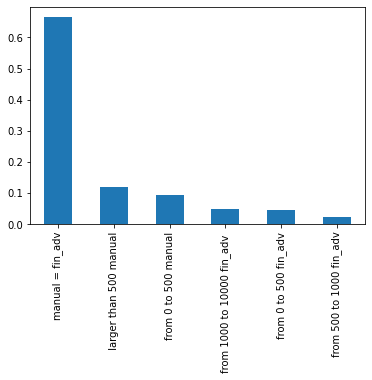

In [ ]:
pd.Series(y).value_counts(normalize=True).plot(kind='bar')

In [ ]:
pd.Series(y).value_counts(normalize=True).to_excel('df1.xlsx')

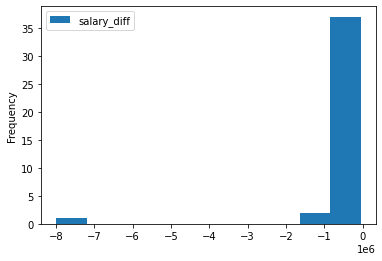

In [ ]:
fin_jun.loc[fin_jun['salary_diff']<-50000 , ['salary_diff']].plot(kind='hist')

In [ ]:
fin_jun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64051 entries, 0 to 529209
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   registration_date             64051 non-null  object 
 1   national_id_map               64051 non-null  int64  
 2   family_size                   63781 non-null  float64
 3   eligible_status               64051 non-null  int64  
 4   indigent_value                357 non-null    float64
 5   monthly_salary                31703 non-null  float64
 6   home_allowance                31703 non-null  float64
 7   manual_monthly_salary         64051 non-null  float64
 8   manual_home_allowance         64051 non-null  float64
 9   financial_adv_salary          64051 non-null  float64
 10  financial_adv_home_allowance  64051 non-null  float64
 11  loan_period_in_month          64045 non-null  float64
 12  applicant_bank                64051 non-null  object 
 13  

In [ ]:
columns = ['unit_size','moh_price','booking_status','booking_unit_type','booking_date', 'date_to_book','project_city','project_name', 'loan_period_in_month'
,'financial_institution_number', 'financial_adv_salary' ,'financial_institution_name','signing_lender_contract_date' ,'profit_rate_in_contract'
,'manual_home_allowance','home_allowance','financial_adv_home_allowance','monthly_salary' , 'indigent_value' , 'banks']

In [ ]:
fin_jun.drop(columns = columns , inplace=True)

In [ ]:
fin_jun

,registration_date,national_id_map,family_size,eligible_status,manual_monthly_salary,applicant_bank,type_of_work,unit_location,project_region,contract_status,fin_institution_num,Building_Type,unit_price,age,Products,has_recommendation,obligatory_consuler,salary_diff
0,2014-03-12,1035967031,6.0,1,11104.0,البنك الأهلي التجاري,3,الخبراء,NaN,2,4030001588,فيلا,569300.0,46,البناء الذاتي,Has Recommendations,False,0.0
1,2019-11-05,1006374621,5.0,1,15130.0,أملاك العالمية,1,جدة,NaN,2,1010234356,فيلا,1265000.0,58,الوحدات الجاهزة,Has Recommendations,False,0.0
2,2020-05-03,1105491367,2.0,1,4325.0,بداية لتمويل المنازل,1,الرياض,NaN,2,1010241934,شقة,437000.0,41,الوحدات الجاهزة,Has Recommendations,True,0.0
3,2020-03-30,1031211103,4.0,1,6980.0,بنك البلاد,1,القريات,NaN,2,1010208295,فيلا,400000.0,36,البناء الذاتي,Has Recommendations,True,0.0
4,2020-06-02,1003954318,4.0,1,8469.0,بنك البلاد,2,الرياض,NaN,2,1010208295,فيلا,1430000.0,35,الوحدات الجاهزة,Has Recommendations,True,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529130,2020-04-30,1061016083,8.0,1,7890.0,مصرف الراجحي,1,ابو طلح,NaN,2,1010000096,فيلا,907500.0,45,الوحدات الجاهزة,No Recommendations,True,711.0
529153,2019-06-20,1081469239,2.0,1,3970.0,البنك الأهلي التجاري,NaN,الدمام,eastern_province,2,4030001588,فيلا,680839.0,32,البيع على الخارطة,No Recommendations,False,0.0
529158,2019-11-20,1006392367,4.0,1,14045.0,البنك الأهلي التجاري,3,جدة,NaN,2,4030001588,فيلا,900000.0,35,القرض القائم,No Recommendations,False,0.0
529165,2019-08-28,1002907234,5.0,1,6830.0,البنك الأول,1,الرياض,NaN,2,1010064925,فيلا,699319.0,38,القرض القائم,No Recommendations,False,0.0


In [ ]:
fin_jun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64051 entries, 0 to 529209
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   registration_date      64051 non-null  object 
 1   national_id_map        64051 non-null  int64  
 2   family_size            63781 non-null  float64
 3   eligible_status        64051 non-null  int64  
 4   manual_monthly_salary  64051 non-null  float64
 5   applicant_bank         64051 non-null  object 
 6   type_of_work           63760 non-null  object 
 7   unit_location          64045 non-null  object 
 8   project_region         19344 non-null  object 
 9   contract_status        64051 non-null  object 
 10  fin_institution_num    64051 non-null  int64  
 11  Building_Type          64051 non-null  object 
 12  unit_price             64045 non-null  float64
 13  age                    64051 non-null  int64  
 14  Products               64051 non-null  object 
 15  h

In [ ]:
fin_jun.drop_duplicates(subset='national_id_map',inplace=True)

In [ ]:
fin_jun.dropna(inplace=True)

In [ ]:
fin_jun.index=(fin_jun['national_id_map'])

In [ ]:
fin_jun.drop(columns=['national_id_map'] , inplace=True)

In [ ]:

fin_jun['contract_status'].value_counts()

2    18523
Name: contract_status, dtype: int64

In [ ]:
fin_jun.dropna(inplace=True)

In [ ]:
Y = fin_jun.loc[(fin_jun['salary_diff'] > 0),:][['salary_diff']]

In [ ]:
X= fin_jun.loc[(fin_jun['salary_diff'] > 0) ,:].drop(columns=['contract_status' , 'salary_diff' , 'registration_date'  ,'unit_location', 'fin_institution_num' ] )

In [ ]:
X

,family_size,eligible_status,manual_monthly_salary,applicant_bank,type_of_work,project_region,Building_Type,unit_price,age,Products,has_recommendation,obligatory_consuler
national_id_map,,,,,,,,,,,,
1099554964,2.0,1,4530.0,بنك البلاد,1,eastern_province,تاون هاوس,564939.00,22,البيع على الخارطة,Has Recommendations,True
1023660309,3.0,1,5500.0,البنك الأهلي التجاري,1,eastern_province,تاون هاوس,516954.00,34,البيع على الخارطة,Has Recommendations,True
1014298192,4.0,1,17500.0,البنك الأهلي التجاري,3,eastern_province,فيلا,765344.00,46,البيع على الخارطة,Has Recommendations,True
1078105044,2.0,1,4290.0,البنك السعودي للاستثمار,3,makkah,فيلا,954000.00,29,البناء الذاتي,No Recommendations,True
1001015336,4.0,1,15123.5,البنك الأهلي التجاري,1,makkah,شقة,436365.00,42,البيع على الخارطة,Has Recommendations,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1064401878,2.0,1,4290.0,مصرف الراجحي,3,makkah,فيلا,738449.00,32,البيع على الخارطة,No Recommendations,False
1060834247,3.0,1,11790.0,البنك الأهلي التجاري,1,eastern_province,فيلا,653894.00,31,البيع على الخارطة,No Recommendations,True
1017586411,10.0,1,8880.0,البنك الأهلي التجاري,3,asir,فيلا,683000.00,46,البيع على الخارطة,No Recommendations,False


In [ ]:
len((X.index))

3706

In [ ]:
from keras.utils.np_utils import to_categorical
from scipy import stats

In [ ]:
Y.shape

(3706, 1)

In [ ]:
preprocessing.MinMaxScaler().fit_transform(Y)

array([[0.05517328],
       [0.01040843],
       [0.22021866],
       ...,
       [0.00480281],
       [0.01060863],
       [0.01601405]])

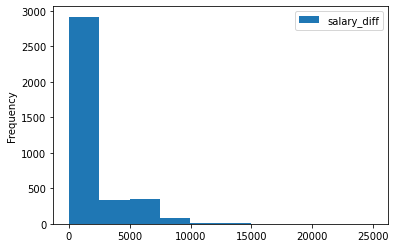

In [ ]:
Y.plot(kind='hist')

In [ ]:
normalizer = preprocessing.MinMaxScaler()
#y_train1=normalizer.fit_transform(Y)
#y_train1 = preprocessing.MinMaxScaler().fit_transform(Y)
y_train1 =preprocessing.power_transform(Y , method='yeo-johnson')
#y_train1=Y

In [ ]:
X = pd.get_dummies(X , columns=['project_region','type_of_work' , 'eligible_status',  'Building_Type' ,'has_recommendation' , 'Products'  , 'applicant_bank' ] , drop_first=True)

In [ ]:
#X_train=preprocessing.MinMaxScaler().fit_transform(X)
X.iloc[: , :5]  =  preprocessing.power_transform(X.iloc[: , :5] , method='yeo-johnson')

In [ ]:
X

,family_size,manual_monthly_salary,unit_price,age,obligatory_consuler,project_region_bahah,project_region_eastern_province,project_region_hail,project_region_jawf,project_region_jizan,project_region_madinah,project_region_makkah,project_region_najran,project_region_northern_borders,project_region_qassim,project_region_riyadh,project_region_tabuk,type_of_work_2.0,type_of_work_3.0,type_of_work_4.0,type_of_work_5.0,type_of_work_6.0,eligible_status_1,Building_Type_شقة,Building_Type_فيلا,has_recommendation_No Recommendations,Products_البيع على الخارطة,Products_القرض القائم,Products_الوحدات الجاهزة,Products_فلل الوزارة,applicant_bank_البنك الأهلي التجاري,applicant_bank_البنك الأول,applicant_bank_البنك السعودي البريطاني,applicant_bank_البنك السعودي الفرنسي,applicant_bank_البنك السعودي للاستثمار,applicant_bank_البنك العربي الوطني,applicant_bank_بنك البلاد,applicant_bank_بنك الجزيرة,applicant_bank_بنك الرياض,applicant_bank_دار التمليك,applicant_bank_سامبا,applicant_bank_مصرف الإنماء,applicant_bank_مصرف الراجحي
national_id_map,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1099554964,-1.291074,-1.703781,-0.073572,-2.629934,0.922076,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1023660309,-0.477593,-1.263834,-0.294374,-0.390508,0.922076,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1014298192,0.156495,1.521645,0.848291,1.366341,0.922076,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1078105044,-1.291074,-1.825874,1.715753,-1.246922,0.922076,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1001015336,0.156495,1.154676,-0.665277,0.819171,0.922076,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064401878,-1.291074,-1.825874,0.724599,-0.722268,-1.084509,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1060834247,-0.477593,0.539321,0.335676,-0.893362,0.922076,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1017586411,2.418891,-0.145061,0.469562,1.366341,-1.084509,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=X

In [ ]:
Y

,salary_diff
national_id_map,
1099554964,1378.0
1023660309,260.0
1014298192,5500.0
1078105044,175.0
1001015336,1273.5
...,...
1064401878,175.0
1060834247,2621.0
1017586411,120.0


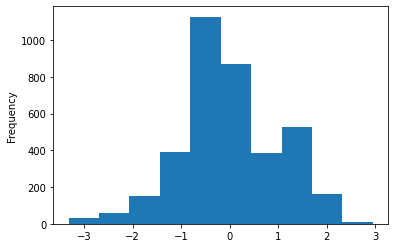

In [ ]:
pd.Series(np.squeeze(preprocessing.power_transform(Y , method='box-cox')).tolist()).plot(kind='hist')

In [ ]:
X_train.shape

(3706, 43)

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
#model = Sequential()
#model.add(Dense(16, input_dim=input_dim, activation='relu'))



#model.add(Dense(8, activation='relu'))




#model.add(Dense(4, activation='relu'))



#IMPORTANT PART
#model.add(Dense(1, activation='relu'))



   # Compile model
#model.compile(loss='mse', optimizer='adam' , metrics= coeff_determination)

#model.fit(X_tr ,y_tr , epochs=100, validation_split=0.3, batch_size=5 ,verbose=0)

In [ ]:

#eval_model=model.evaluate(X_tr, y_tr)
#eval_model

In [ ]:
#eval_model2=model.evaluate(X_te, y_te)
#eval_model2

In [ ]:
#test_pred= model.predict(X_te)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

#r2_score(normalizer.inverse_transform(y_te), normalizer.inverse_transform(test_pred))

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train1, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


rf = XGBRegressor(n_estimators = 10000 , max_depth= 6  , learning_rate=0.001 , subsample=0.9, colsample_bytree=0.9 , objective='reg:squarederror' ,  gamma=0.3
                  ,random_state=42 , n_jobs=-1  , max_delta_step=5)
rf.fit(X_tr, y_tr)




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.3,
             importance_type='gain', learning_rate=0.001, max_delta_step=5,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9, verbosity=1)

In [ ]:
print('Training Accuracy: {:.2f} '.format(rf.score(X_tr, y_tr)*100))




Training Accuracy: 73.76 


In [ ]:
print('Test Accuracy: {:.2f} '.format(rf.score(X_te, y_te)*100))

Test Accuracy: 33.18 


In [ ]:
from sklearn.metrics import mean_squared_error
test_pred = rf.predict(X_te)

mean_squared_error(y_te, test_pred)

0.6362258578635447

In [ ]:
features = X.columns

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)

In [ ]:
# booking - sign 

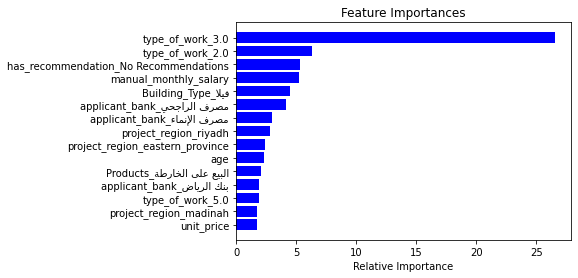

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices][-15:]*100, color='b', align='center')
plt.yticks(range(len(indices[-15:])), [get_display(arabic_reshaper.reshape(features[i])) for i in indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
pd.DataFrame (features[indices][-15 : ] , importances[indices][-15 : ] ).to_excel('xawy.xlsx')

Text(0, 0.5, 'salary difference')

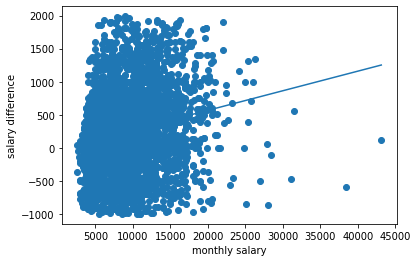

In [ ]:
testing_data = fin_jun.loc[(fin_jun['salary_diff']!=0) & (fin_jun['salary_diff']> -1000) & (fin_jun['salary_diff'] < 2000) , :]
Y=  testing_data['salary_diff']
X = testing_data['manual_monthly_salary']
results = sm.OLS(Y,sm.add_constant(X)).fit()

plt.scatter(X,Y)



plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('monthly salary')
plt.ylabel('salary difference')


In [ ]:
fin_jun.loc[fin_jun['salary_diff']>0 , ['manual_monthly_salary' , 'salary_diff']].corr()

,manual_monthly_salary,salary_diff
manual_monthly_salary,1.000000,0.415894
salary_diff,0.415894,1.000000


Text(0, 0.5, 'salary difference')

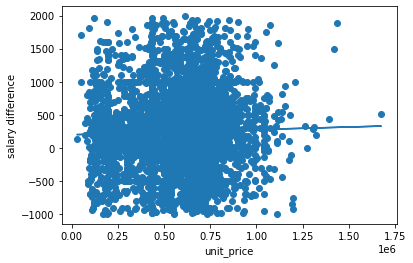

In [ ]:
Y=  testing_data['salary_diff']
X = testing_data['unit_price']
results = sm.OLS(Y,sm.add_constant(X)).fit()



plt.scatter(X,Y)
plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X))
plt.xlabel('unit_price')
plt.ylabel('salary difference')


In [ ]:
fin_jun.loc[(fin_jun['salary_diff']!=0) & (fin_jun['salary_diff']> -1000) & (fin_jun['salary_diff'] < 5000), ['salary_diff' , 'unit_price']].corr()

,salary_diff,unit_price
salary_diff,1.000000,-0.002763
unit_price,-0.002763,1.000000


Text(0, 0.5, 'salary difference')

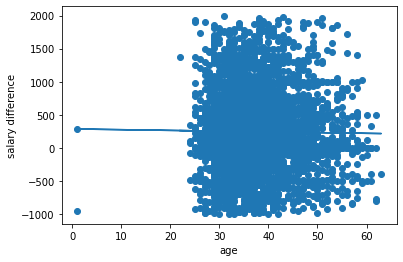

In [ ]:
testing_data = fin_jun.loc[(fin_jun['salary_diff']!=0) & (fin_jun['salary_diff']> -1000) & (fin_jun['salary_diff'] < 2000) , :]
Y=  testing_data['salary_diff']
X = testing_data['age']
results = sm.OLS(Y,sm.add_constant(X)).fit()



plt.scatter(X,Y)
plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X))
plt.xlabel('age')
plt.ylabel('salary difference')


In [ ]:
fin_jun = financial.loc[(financial['manual_monthly_salary'] > 0) & (financial['financial_adv_salary'] > 0 ) , :]

In [ ]:
fin_jun.drop(columns=['max_loan_amount','lender_name' ,'recommendation_created_at'],inplace=True)

In [ ]:
fin_jun.loc[:,['monthly_salary','home_allowance','financial_adv_salary','financial_adv_home_allowance' ,'manual_monthly_salary']].corr()

,monthly_salary,home_allowance,financial_adv_salary,financial_adv_home_allowance,manual_monthly_salary
monthly_salary,1.000000,0.922838,0.262897,0.551999,0.829954
home_allowance,0.922838,1.000000,0.237808,0.600457,0.751258
financial_adv_salary,0.262897,0.237808,1.000000,0.294953,0.352267
financial_adv_home_allowance,0.551999,0.600457,0.294953,1.000000,0.525856
manual_monthly_salary,0.829954,0.751258,0.352267,0.525856,1.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()


In [ ]:
fin_jun['salary_diff1'] = fin_jun['monthly_salary']-fin_jun['financial_adv_salary']


In [ ]:
fin_jun=fin_jun.dropna(subset=['monthly_salary'])

In [ ]:
fin_jun['salary_diff1'].describe()

count    3.062890e+05
mean    -1.006711e+03
std      1.492215e+04
min     -7.993625e+06
25%     -1.365000e+03
50%     -4.100000e+02
75%      8.600000e-01
max      5.278480e+04
Name: salary_diff1, dtype: float64

In [ ]:
fin_jun.loc[fin_jun['salary_diff1']==fin_jun['salary_diff1'].min()]

,registration_date,national_id_map,family_size,eligible_status,indigent_value,monthly_salary,home_allowance,manual_monthly_salary,manual_home_allowance,financial_adv_salary,financial_adv_home_allowance,loan_period_in_month,applicant_bank,type_of_work,booking_status,booking_date,financial_institution_number,financial_institution_name,profit_rate_in_contract,unit_location,project_region,project_city,project_name,contract_status,fin_institution_num,signing_lender_contract_date,booking_unit_type,Building_Type,unit_size,unit_price,moh_price,age,Products,has_recommendation,banks,obligatory_consuler,date_to_book,salary_diff1
515042,2019-06-08,1026601037,4.0,1,NaN,6675.0,1112.5,8600.0,1000.0,8000300.0,600.0,149.0,مصرف الراجحي,1,NaN,2000-02-02 11:09:00,1010234356,أملاك العالمية,4.7,الرياض,NaN,NaN,NaN,2,1010234356,2020-08-24 00:00:00,NaN,فيلا,NaN,785000.0,NaN,46,الوحدات الجاهزة,No Recommendations,الراجحي,True,2000-02-02,-7993625.0


In [ ]:
#fin_jun['salary_diff']/12

In [ ]:
fin_jun.loc[fin_jun['salary_diff1']==fin_jun['salary_diff1'].max()].drop_duplicates()


,registration_date,national_id_map,family_size,eligible_status,indigent_value,monthly_salary,home_allowance,manual_monthly_salary,manual_home_allowance,financial_adv_salary,financial_adv_home_allowance,loan_period_in_month,applicant_bank,type_of_work,booking_status,booking_date,financial_institution_number,financial_institution_name,profit_rate_in_contract,unit_location,project_region,project_city,project_name,contract_status,fin_institution_num,signing_lender_contract_date,booking_unit_type,Building_Type,unit_size,unit_price,moh_price,age,Products,has_recommendation,banks,obligatory_consuler,date_to_book,salary_diff1
24193,2019-12-09,1042462315,5.0,1,NaN,69784.8,17446.2,17000.0,3700.0,17000.0,3700.0,268.0,البنك السعودي للاستثمار,2,NaN,2000-02-02 11:09:00,1010250808,مصرف الإنماء,6.55,الرياض,NaN,NaN,NaN,2,1010250808,2020-02-16 00:00:00,NaN,فيلا,NaN,999535.89,NaN,37,الوحدات الجاهزة,Has Recommendations,السعودي للإستثمار,False,2000-02-02,52784.8


In [ ]:
fin_jun.drop_duplicates(inplace=True)

In [ ]:
y = []
for x in fin_jun['salary_diff1']:
   if x == 0 : a='API = fin_adv'
   elif  -10000 < x <= -1000: a = 'from 1000 to 10000 fin_adv '
   elif  -1000 < x <=-500: a = 'from 500 to 1000 fin_adv'
   elif  -500 < x <0: a = 'from 0 to 500 fin_adv'
   elif   500 >= x >0: a = 'from 0 to 500 API'
   elif  x > 500 :  a = ' larger than 500 API'
   y.append(a)

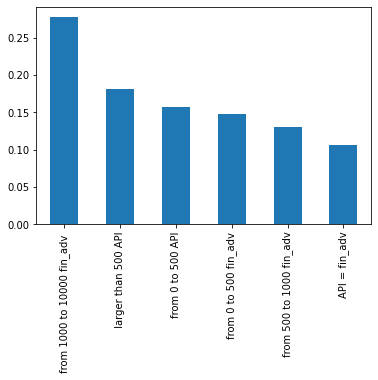

In [ ]:
pd.Series(y).value_counts(normalize=True).plot(kind='bar')

In [ ]:
pd.Series(y).value_counts(normalize=True).to_excel('df.xlsx')

In [ ]:
salaries=fin_jun.loc[fin_jun['salary_diff1'] > 0 , ['monthly_salary' , 'salary_diff1']]

In [ ]:
salaries['monthly_salary']

4          9019.60
9          9454.00
25        12826.40
28        15730.00
33        19805.00
            ...   
528564    12160.00
528599    25175.20
528842     7895.00
529006     4641.08
529130     7890.00
Name: monthly_salary, Length: 10584, dtype: float64

In [ ]:
salaries['api_cat_1'] = pd.cut(salaries['monthly_salary'], bins=[0,7000,8000,9000,10000,11000,12000,13000,14000,15000,1000000])

In [ ]:
salaries['api_cat_2'] = pd.cut(salaries['monthly_salary'], bins=[0,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,1000000])

In [ ]:
salaries['api_cat_1'].value_counts(normalize=True).to_excel('xvid1.xlsx')

In [ ]:
salaries['api_cat_2'].value_counts(normalize=True).to_excel('xvid2.xlsx')

In [ ]:
salaries['api_cat_1'].value_counts().to_excel('xvid1.xlsx')

In [ ]:
salaries['api_cat_2'].value_counts().to_excel('xvid2.xlsx')

In [ ]:
salaries.groupby('api_cat_1')['salary_diff1'].mean().to_excel('xvid3.xlsx')

In [ ]:
salaries.groupby('api_cat_2')['salary_diff1'].mean().to_excel('xvid4.xlsx')

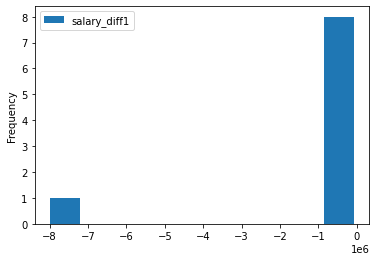

In [ ]:
fin_jun.loc[fin_jun['salary_diff1']<-50000 , ['salary_diff1']].plot(kind='hist')

In [ ]:
fin_jun.drop(columns=['booking_date', 'date_to_book','project_city','project_name','financial_institution_number','signing_lender_contract_date','unit_location','indigent_value','fin_institution_num','applicant_bank','indigent_value','manual_home_allowance','home_allowance','financial_adv_home_allowance'],inplace=True)

In [ ]:
fin_jun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31703 entries, 1 to 529165
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   registration_date           31703 non-null  object 
 1   national_id_map             31703 non-null  int64  
 2   family_size                 31554 non-null  float64
 3   eligible_status             31703 non-null  int64  
 4   monthly_salary              31703 non-null  float64
 5   manual_monthly_salary       31703 non-null  float64
 6   financial_adv_salary        31703 non-null  float64
 7   loan_period_in_month        31699 non-null  float64
 8   type_of_work                31686 non-null  object 
 9   booking_status              10600 non-null  object 
 10  financial_institution_name  31703 non-null  object 
 11  profit_rate_in_contract     31699 non-null  float64
 12  project_region              10600 non-null  object 
 13  contract_status             31

In [ ]:
fin_jun.index=(fin_jun['national_id_map'])

In [ ]:
fin_jun.drop(columns=['national_id_map'] , inplace=True)

In [ ]:
fin_jun.dropna(inplace=True)

In [ ]:
Y = fin_jun.loc[fin_jun['salary_diff1'] != 0 ,:][['salary_diff1']]

In [ ]:
X= fin_jun.loc[fin_jun['salary_diff1'] != 0 ,:].drop(columns=['salary_diff1' , 'contract_status' ,'registration_date' , 'financial_adv_salary' ,'manual_monthly_salary'] ).replace(np.nan,0)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train1=preprocessing.MinMaxScaler().fit_transform(Y)


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train=preprocessing.MinMaxScaler().fit_transform(X)


In [ ]:
X_train.shape

(8886, 75)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
rf.fit(X_train, y_train1)

print('Training Accuracy: {:.2f} '.format(rf.score(X_train, y_train1)*100))


Training Accuracy: 82.94 


In [ ]:
features = X.columns

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)

In [ ]:
# booking - sign 

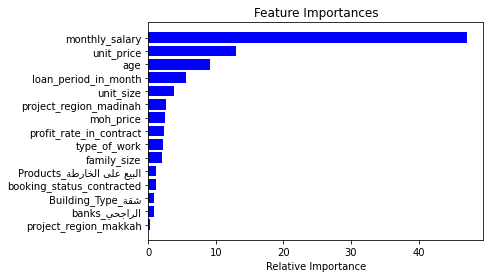

In [ ]:
plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices][-15:]*100, color='b', align='center')
plt.yticks(range(len(indices[-15:])), [get_display(arabic_reshaper.reshape(features[i])) for i in indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
pd.DataFrame (features[indices][-15 : ] , importances[indices][-15 : ] ).to_excel('x.xlsx')

Text(0, 0.5, 'salary difference')

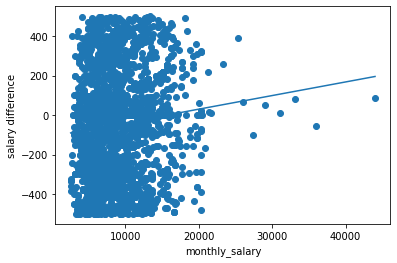

In [ ]:
testing_data = fin_jun.loc[(fin_jun['salary_diff1']!=0) & (fin_jun['salary_diff1']> -500) & (fin_jun['salary_diff1'] < 500) & (fin_jun['monthly_salary'] > 0) , :]
Y=  testing_data['salary_diff1']
X = testing_data['monthly_salary']
results = sm.OLS(Y,sm.add_constant(X)).fit()

plt.scatter(X,Y)



plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
plt.xlabel('monthly_salary')
plt.ylabel('salary difference')


In [ ]:
testing_data.loc[: , ['monthly_salary' , 'salary_diff1']].corr()

,monthly_salary,salary_diff1
monthly_salary,1.000000,0.098985
salary_diff1,0.098985,1.000000


In [ ]:
fin_jun.replace(np.nan , 0 , inplace=True)

Text(0, 0.5, 'salary difference')

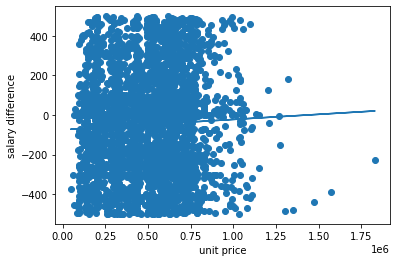

In [ ]:
Y=  testing_data['salary_diff1']
X = testing_data['unit_price']
results = sm.OLS(Y,sm.add_constant(X)).fit()



plt.scatter(X,Y)
plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X))
plt.xlabel('unit price')
plt.ylabel('salary difference')


In [ ]:
testing_data.loc[:, ['salary_diff1' , 'monthly_salary']].corr()

,salary_diff1,monthly_salary
salary_diff1,1.000000,0.098985
monthly_salary,0.098985,1.000000


Text(0, 0.5, 'salary difference')

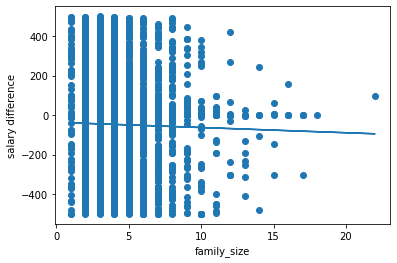

In [ ]:
Y=  testing_data.loc[(testing_data['salary_diff1'] > -2000) & (testing_data['salary_diff1'] < 2000), : ]['salary_diff1']
X = testing_data.loc[(testing_data['salary_diff1'] > -2000) & (testing_data['salary_diff1'] < 2000), : ]['family_size']
results = sm.OLS(Y,sm.add_constant(X)).fit()



plt.scatter(X,Y)
plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(X))
plt.xlabel('family_size')
plt.ylabel('salary difference')


In [ ]:
fin_jun.loc[:, ['salary_diff1' , 'family_size']].corr()

,salary_diff1,family_size
salary_diff1,1.00000,-0.03079
family_size,-0.03079,1.00000


In [ ]:
 financial['price_range']=pd.cut(financial['unit_price'],bins=[0,250000,500000,750000,1000000,10000000] )

In [ ]:
 financial['salary_range']=pd.cut(financial['financial_adv_salary'],bins=[-120,3000,5000,9000,12000,15000,1000000 ], include_lowest=True)

In [ ]:
financial_backup=financial

In [ ]:
financial_backup=financial_backup.merge(pd.DataFrame(financial_backup.groupby(['lender_name' , 'price_range','salary_range'])['profit_rate_in_contract'].mean()) , on =['lender_name' , 'price_range','salary_range'] )

In [ ]:
financial_backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374468 entries, 0 to 374467
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   registration_date             374468 non-null  object  
 1   national_id_map               374468 non-null  int64   
 2   family_size                   372921 non-null  float64 
 3   eligible_status               374468 non-null  int64   
 4   indigent_value                1798 non-null    float64 
 5   monthly_salary                227144 non-null  float64 
 6   home_allowance                227144 non-null  float64 
 7   manual_monthly_salary         370865 non-null  float64 
 8   manual_home_allowance         370865 non-null  float64 
 9   financial_adv_salary          374468 non-null  float64 
 10  financial_adv_home_allowance  374468 non-null  float64 
 11  loan_period_in_month          374468 non-null  float64 
 12  applicant_bank                

In [ ]:
idx1 = financial_backup.groupby(['national_id_map' , 'registration_date'])['profit_rate_in_contract_y'].transform(min) == financial_backup['profit_rate_in_contract_y']

In [ ]:
financial_backup=financial_backup[idx1]

In [ ]:
table = pd.crosstab(financial_backup['financial_institution_name'] ,financial_backup['lender_name']  )
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
table.index = pd.Series(table.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
table.columns = pd.Series(table.columns).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
(table.apply(lambda r: r/r.sum(), axis=1)*100).to_excel('table.xlsx') 

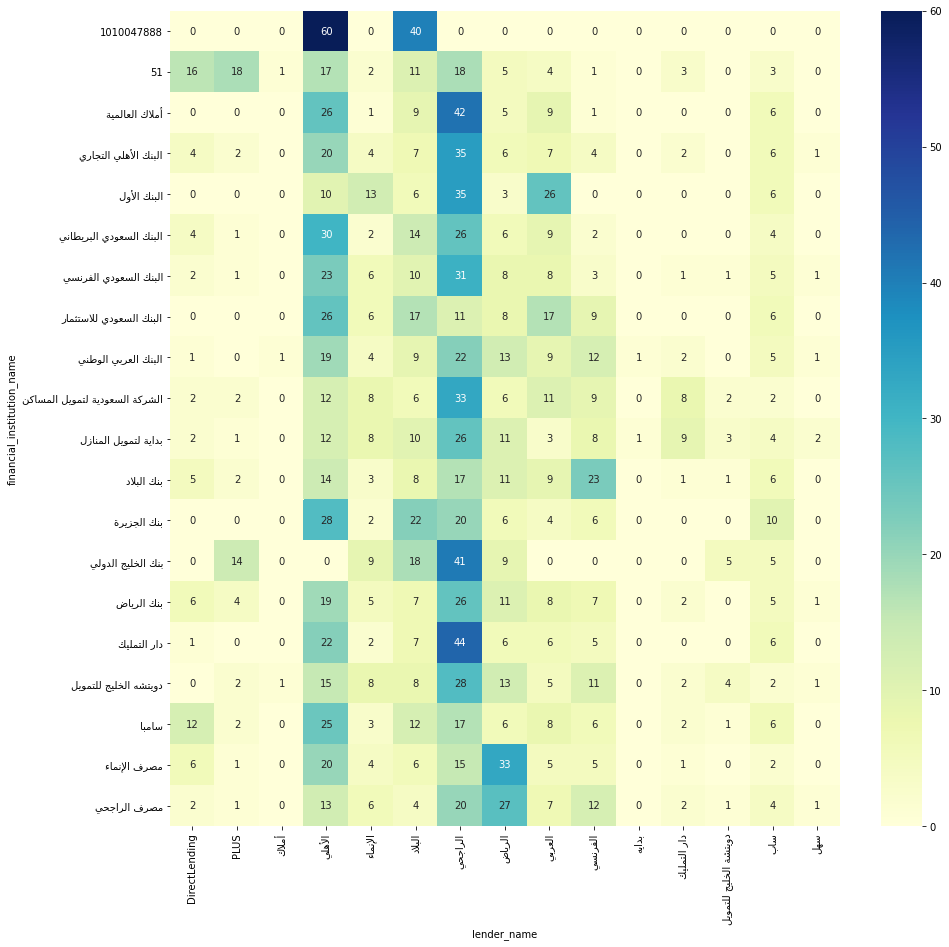

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(table.apply(lambda r: r/r.sum(), axis=1)*100,0) , cmap="YlGnBu" ,annot=True  ,fmt='g')

In [ ]:
financial_backup['same_less']=(financial_backup['lender_name'] == financial_backup['financial_institution_name'] )

In [ ]:
bank_choiceq = financial_backup.groupby('financial_institution_name')['same_less'].mean()*100

In [ ]:
bank_choiceq

financial_institution_name
1010047888                        0.000000
51                                0.000000
أملاك العالمية                    0.000000
البنك الأهلي التجاري              0.000000
البنك الأول                       0.000000
البنك السعودي البريطاني           0.000000
البنك السعودي الفرنسي             0.000000
البنك السعودي للاستثمار           0.000000
البنك العربي الوطني               0.000000
الشركة السعودية لتمويل المساكن    0.000000
بداية لتمويل المنازل              0.000000
بنك البلاد                        0.000000
بنك الجزيرة                       0.000000
بنك الخليج الدولي                 0.000000
بنك الرياض                        0.000000
دار التمليك                       0.355872
دويتشه الخليج للتمويل             0.000000
سامبا                             0.000000
مصرف الإنماء                      0.000000
مصرف الراجحي                      0.000000
Name: same_less, dtype: float64

In [ ]:
idx = financial.groupby(['national_id_map' , 'registration_date'])['max_loan_amount'].transform(max) == financial['max_loan_amount']

In [ ]:
financial=financial[idx]

In [ ]:
len(financial)

40587

In [ ]:
financial['same_bank'] = (financial['financial_institution_name'] == financial['applicant_bank'])

In [ ]:
financial['same_loan_bank'] = (financial['financial_institution_name'] == financial['lender_name'])

In [ ]:
table = pd.crosstab(financial['financial_institution_name'] ,financial['applicant_bank']  )
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
financial_banks=financial.loc[pd.isna(financial['financial_institution_name'])*1 == 0 ,:]

In [ ]:
table = pd.crosstab(financial_banks['financial_institution_name'] ,financial_banks['banks']  )
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
p

0.0

In [ ]:
bank_suggest = financial['financial_institution_name'].value_counts(normalize=True)

In [ ]:
financial['bank_suggest'] = financial['financial_institution_name'] .apply(lambda x: np.where(x in list(bank_suggest.index[:5]), x , 'أخرى'))

In [ ]:
bank_suggest = financial['bank_suggest'].value_counts(normalize=True)

In [ ]:
bank_suggest.to_excel('x1.xlsx')

In [ ]:
bank_suggest.index = pd.Series(bank_suggest.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

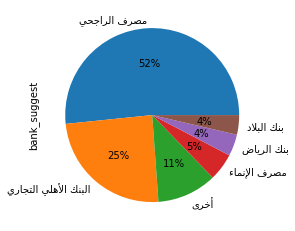

In [ ]:
bank_suggest.plot(kind='pie' , autopct='%1.0f%%' )

In [ ]:
financial_banks=financial.loc[pd.isna(financial['financial_institution_name'])*1 == 0 ,:]

In [ ]:
financial_banks['same_bank'] = (financial_banks['financial_institution_name'] == financial_banks['banks'])*1

In [ ]:
financial_banks['same_bank'] = (financial_banks['financial_institution_name'] == financial_banks['banks'])*1

In [ ]:
financial_banks['same_bank'].mean()

0.0003449380343459728

In [ ]:
table = pd.crosstab(financial_banks['financial_institution_name'] ,financial_banks['banks']  )
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
bank_choice = financial_banks.groupby('financial_institution_name')['same_bank'].mean()*100

In [ ]:
bank_choice.index = pd.Series(bank_choice.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
table

banks,أملاك,الأهلي,الإنماء,البلاد,الراجحي,الرياض,السعودي للإستثمار,الشركة السعودية لتمويل المساكن,العربي,الفرنسي,بدايه,دار التمليك,ساب
financial_institution_name,,,,,,,,,,,,,
1010047888,0,0,0,0,2,0,0,0,0,0,0,0,0
51,0,38,14,28,54,63,35,1,27,33,0,0,24
أملاك العالمية,3,22,9,9,21,9,8,0,5,8,1,0,11
البنك الأهلي التجاري,1,8842,50,45,342,142,91,2,68,47,5,8,52
البنك الأول,0,0,0,0,1,1,0,0,0,0,0,0,0
البنك السعودي البريطاني,0,6,1,1,7,12,2,0,2,4,0,1,313
البنك السعودي الفرنسي,0,20,7,2,13,19,21,0,21,517,0,1,21
البنك السعودي للاستثمار,0,0,0,0,3,0,42,0,0,0,0,0,0
البنك العربي الوطني,0,12,1,3,10,8,11,0,514,5,4,2,4


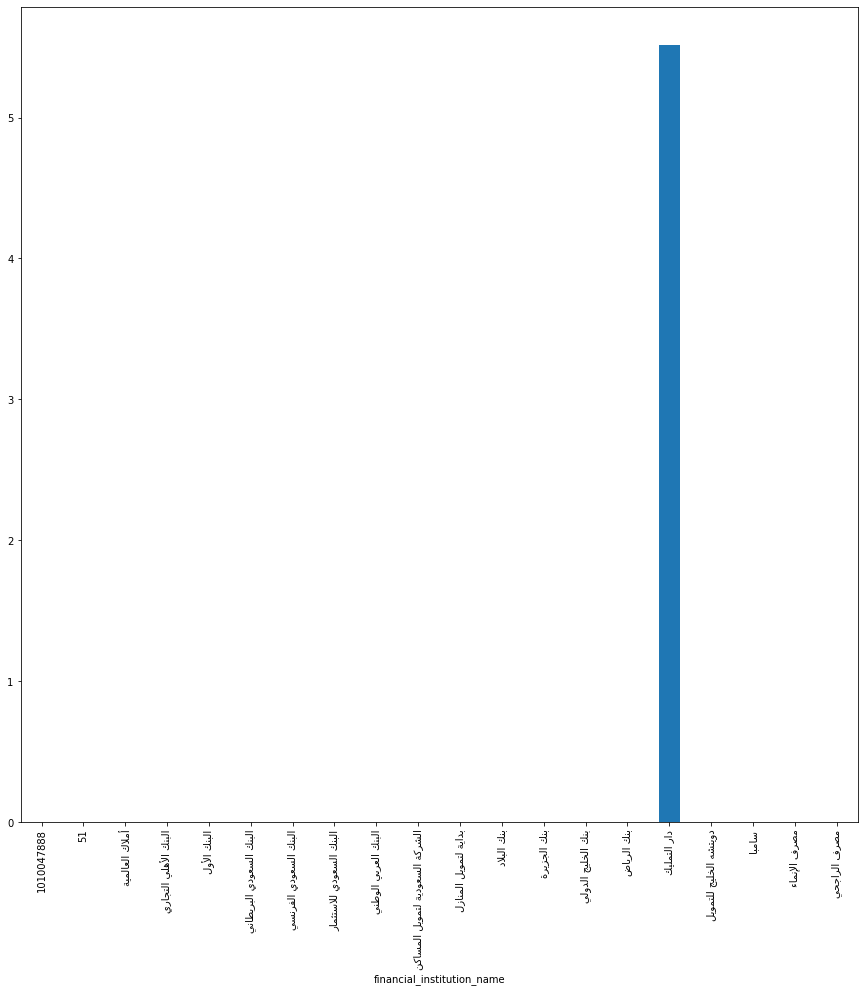

In [ ]:
label=bank_choice.values
plt.figure(figsize=(15,15))

(bank_choice).plot(kind='bar')


In [ ]:
table.index = pd.Series(table.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
table.columns = pd.Series(table.columns).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

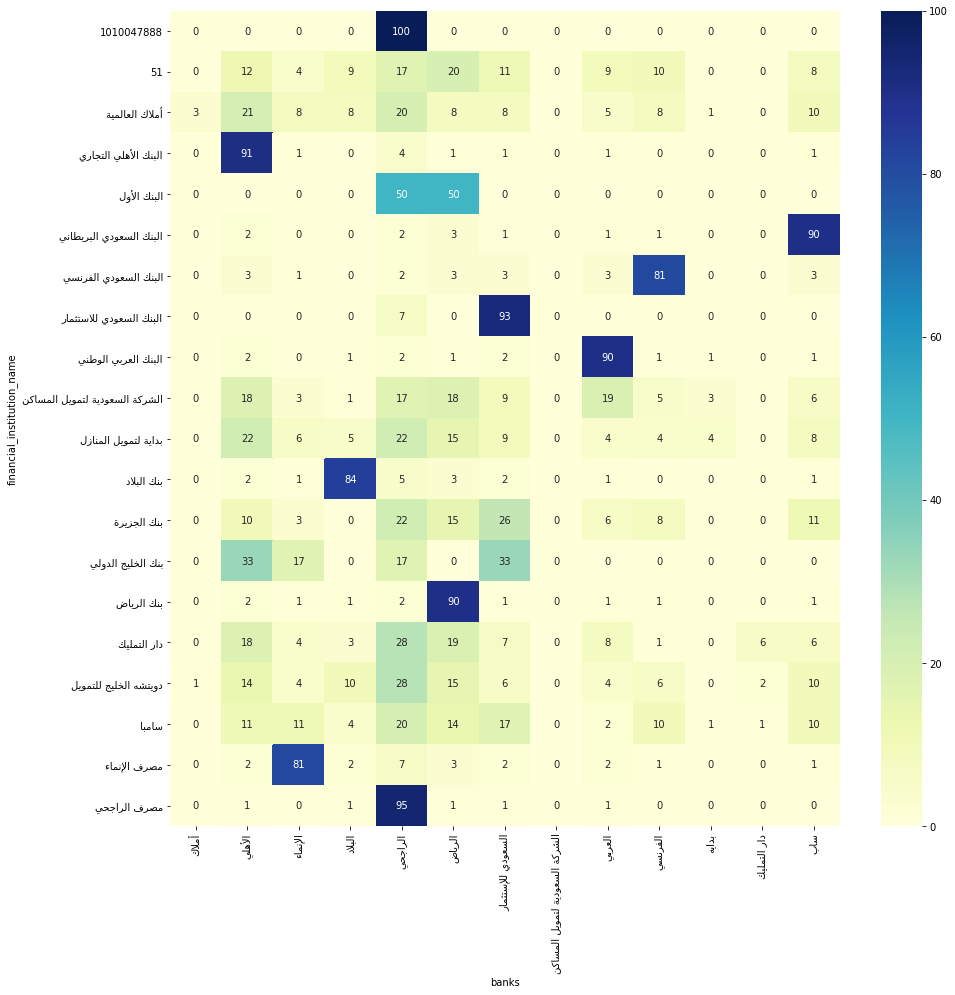

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(table.apply(lambda r: r/r.sum(), axis=1)*100,0) , cmap="YlGnBu" ,annot=True  ,fmt='g')

In [ ]:
financial_banks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40587 entries, 5 to 529226
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   registration_date             40587 non-null  object  
 1   national_id_map               40587 non-null  int64   
 2   family_size                   40390 non-null  float64 
 3   eligible_status               40587 non-null  int64   
 4   indigent_value                259 non-null    float64 
 5   monthly_salary                23771 non-null  float64 
 6   home_allowance                23771 non-null  float64 
 7   manual_monthly_salary         40212 non-null  float64 
 8   manual_home_allowance         40212 non-null  float64 
 9   financial_adv_salary          40587 non-null  float64 
 10  financial_adv_home_allowance  40587 non-null  float64 
 11  loan_period_in_month          40586 non-null  float64 
 12  applicant_bank                40587 non-null 

In [ ]:
financial['lender_name'].value_counts()

دويتشة الخليج للتمويل    13898
الإنماء                   3773
الفرنسي                   2311
بدايه                     2124
الأهلي                    1570
الراجحي                   1347
العربي                    1305
دار التمليك               1203
البلاد                     990
الرياض                     472
أملاك                      434
PLUS                        94
DirectLending               65
ساب                         23
سهل                          1
Name: lender_name, dtype: int64

In [ ]:
financial_banks['same_loan_bank'].mean()

0.002069628206075837

In [ ]:
#financial_banks.drop(columns=['recommendation_created_at' ,'lender_name' ,'max_loan_amount' , 'booking_date', 'date_to_book','project_city','project_name','financial_institution_number','signing_lender_contract_date','unit_location','indigent_value',
#'fin_institution_num','applicant_bank','indigent_value','manual_home_allowance','home_allowance','financial_adv_home_allowance','monthly_salary'],inplace=True)

In [ ]:
financial_banks.drop(columns=['booking_date', 'date_to_book','project_city','project_name','financial_institution_number','signing_lender_contract_date','unit_location','indigent_value',
'fin_institution_num','applicant_bank','indigent_value','manual_home_allowance','home_allowance','financial_adv_home_allowance','monthly_salary'],inplace=True)

In [ ]:
#idx = financial_banks.groupby(['national_id_map'])['max_loan_amount'].transform(max) == df['max_loan_amount']

In [ ]:
#financial_banks=financial_banks[idx]

In [ ]:
financial_banks.index=(financial_banks['national_id_map'])

In [ ]:
financial_banks.drop(columns=['national_id_map'] , inplace=True)

In [ ]:
financial_banks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40587 entries, 1099554964 to 1058691963
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   registration_date           40587 non-null  object  
 1   family_size                 40390 non-null  float64 
 2   eligible_status             40587 non-null  int64   
 3   manual_monthly_salary       40212 non-null  float64 
 4   financial_adv_salary        40587 non-null  float64 
 5   loan_period_in_month        40586 non-null  float64 
 6   type_of_work                40436 non-null  object  
 7   booking_status              14556 non-null  object  
 8   financial_institution_name  40587 non-null  object  
 9   profit_rate_in_contract     40586 non-null  float64 
 10  max_loan_amount             40587 non-null  float64 
 11  lender_name                 29610 non-null  object  
 12  recommendation_created_at   40587 non-null  object  
 13  pr

In [ ]:
table = pd.crosstab(financial_banks['financial_institution_name'] ,financial_banks['lender_name']  )
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
bank_choice = financial_banks.groupby('financial_institution_name')['same_loan_bank'].mean()*100

In [ ]:
bank_choice.to_excel('x2.xlsx')

In [ ]:
bank_choice.index = pd.Series(bank_choice.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

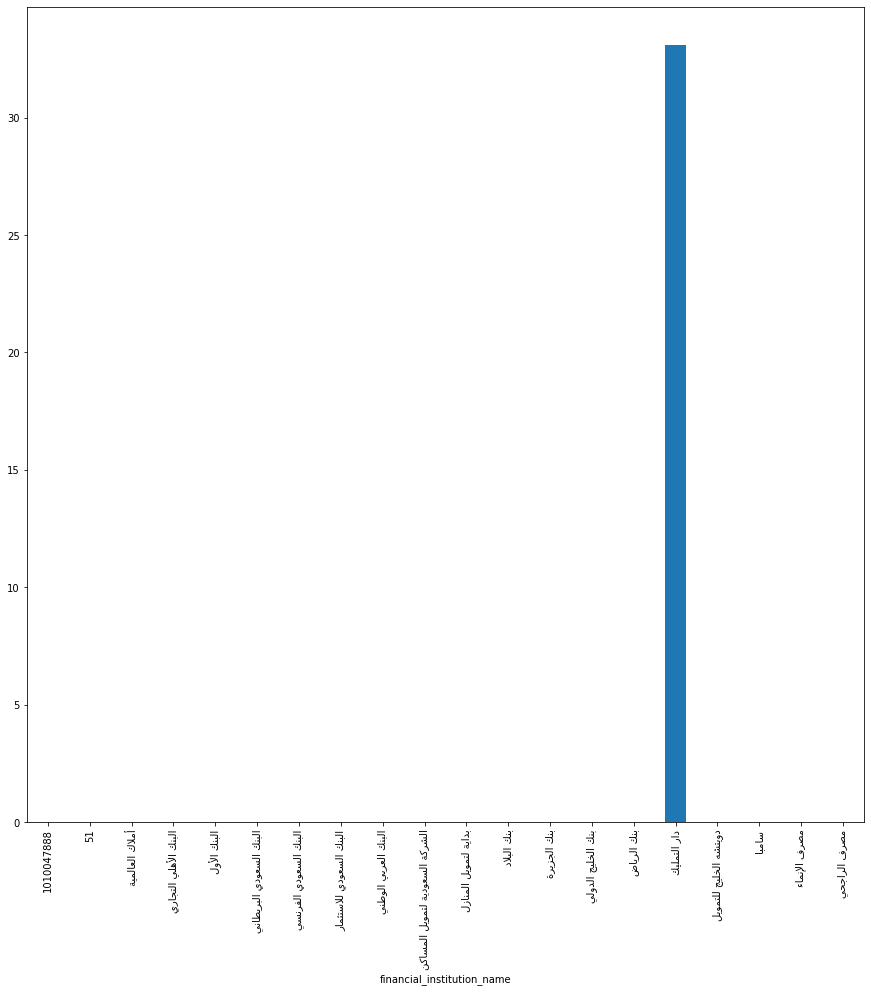

In [ ]:
label=bank_choice.values
plt.figure(figsize=(15,15))

(bank_choice).plot(kind='bar')


In [ ]:
table.index = pd.Series(table.index).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
table.columns = pd.Series(table.columns).apply(lambda x: get_display(arabic_reshaper.reshape(x)))

In [ ]:
(table.apply(lambda r: r/r.sum(), axis=1)*100).to_excel('table.xlsx') 

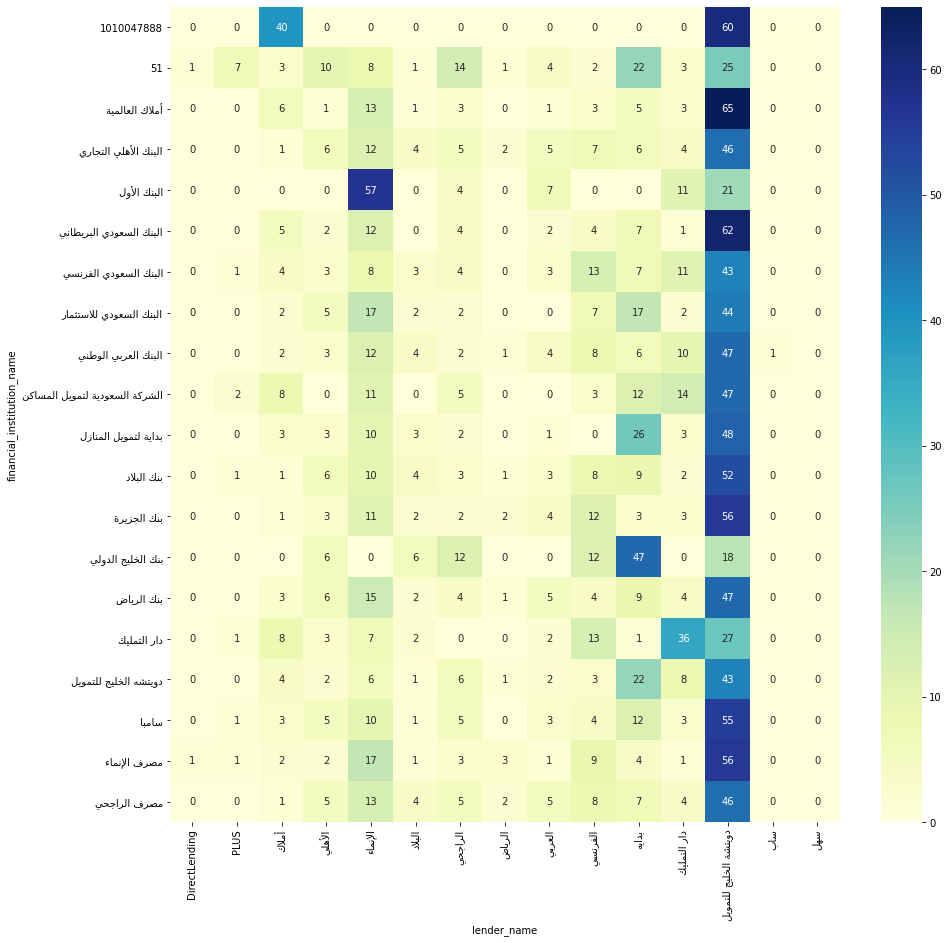

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(table.apply(lambda r: r/r.sum(), axis=1)*100,0) , cmap="YlGnBu" ,annot=True  ,fmt='g')

In [ ]:
financial_banks.replace(np.nan,0,inplace=True)

In [ ]:
Y = financial_banks['financial_institution_name']

In [ ]:
encoder = LabelEncoder()
encoder.fit( Y )
encoded_Y = encoder.transform(Y )
# convert integers to dummy variables (i.e. one hot encoded)
y_train1 = to_categorical(encoded_Y)

In [ ]:
X= financial_banks.drop(columns=['max_loan_amount','recommendation_created_at','lender_name','bank_suggest', 'financial_institution_name','banks','contract_status' ,'registration_date' , 'financial_adv_salary' , 'same_bank' ,'manual_monthly_salary' ] )

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train=preprocessing.MinMaxScaler().fit_transform(X)


In [ ]:
X_train.shape

(40587, 59)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train1)

print('Training Accuracy: {:.2f} '.format(rf.score(X_train, y_train1)*100))


Training Accuracy: 99.93 


In [ ]:
features = X.columns

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)

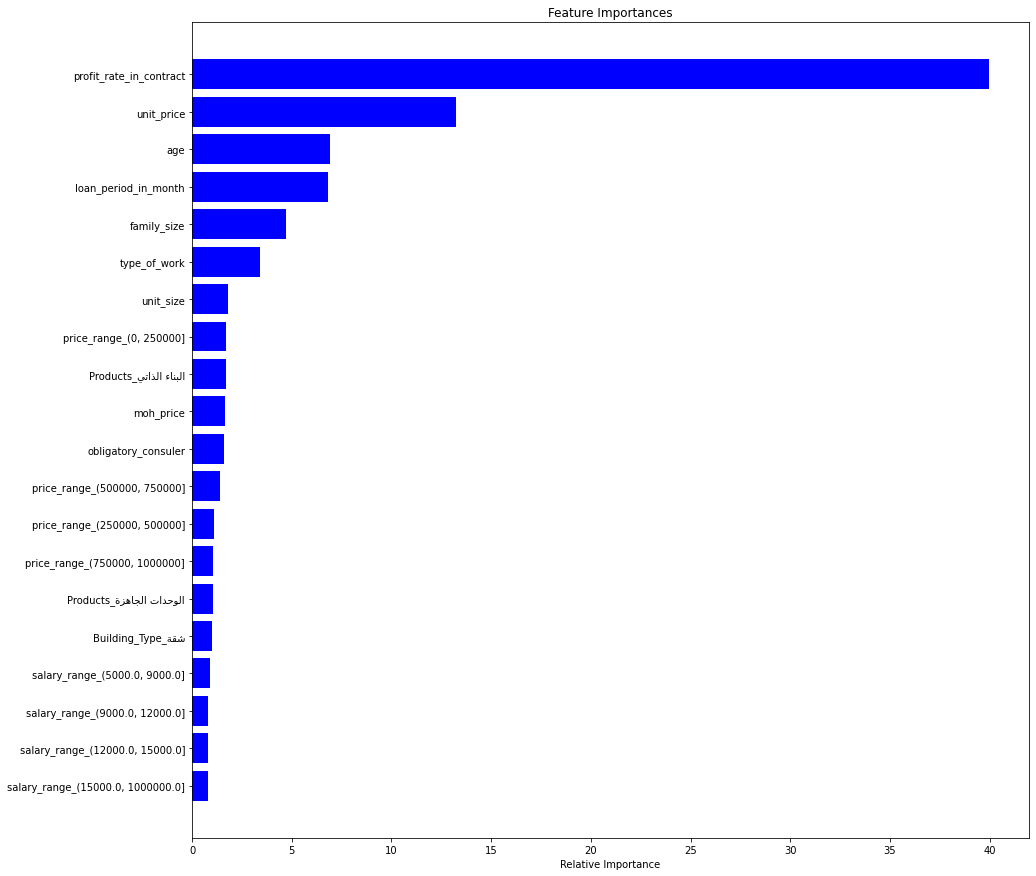

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices[-20:])), importances[indices][-20:]*100, color='b', align='center')
plt.yticks(range(len(indices[-20:])), [get_display(arabic_reshaper.reshape(features[i])) for i in indices[-20:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
pd.DataFrame(features[indices][-20:] , importances[indices][-20:]).to_excel('xx.xlsx')

In [ ]:
banks_profit = pd.pivot_table(financial_banks,index='banks',values='profit_rate_in_contract',aggfunc='mean')

In [ ]:
banks_profit

,profit_rate_in_contract
banks,
0,4.977585
أملاك,4.553333
الأهلي,5.322379
الإنماء,5.353672
البلاد,5.594806
الراجحي,2.993427
الرياض,5.301197
السعودي للإستثمار,4.537566
الشركة السعودية لتمويل المساكن,3.430000


In [ ]:
banks_profit.to_excel('xx1.xlsx')

In [ ]:
banks_profit.index = pd.Series(banks_profit.index).apply(lambda x : get_display(arabic_reshaper.reshape(x)))

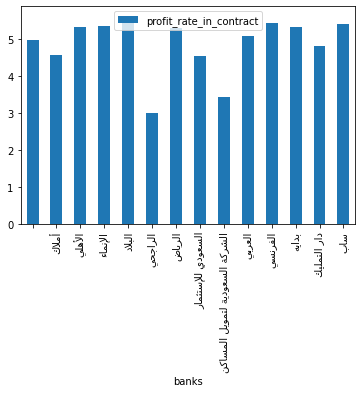

In [ ]:
banks_profit.plot(kind='bar')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(' profit_rate_in_contract ~ C(banks)', data=financial_banks).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,57208.603092,1.0,26064.105541,0.0
C(banks),53602.678847,13.0,1878.558069,0.0
Residual,89054.452669,40573.0,NaN,NaN


In [ ]:
 financial['price_range']=pd.cut(financial['unit_price'],bins=[0,250000,500000,750000,1000000,10000000] )

In [ ]:
 financial['salary_range']=pd.cut(financial['financial_adv_salary'],bins=[-120,3000,5000,9000,12000,15000,1000000 ], include_lowest=True)

In [ ]:
financial.pivot_table(index=['financial_institution_name' ,'price_range' ,'salary_range' ] , values = ['profit_rate_in_contract'] , aggfunc=['min','mean','max']).to_excel('prices.xlsx')

In [ ]:
len(financial)

40587

In [ ]:
#with pd.ExcelWriter('output.xlsx') as writer:  
 #   table1.to_excel(writer, sheet_name='q1')
  #  table2.to_excel(writer, sheet_name='q2%')
   # table4.to_excel(writer, sheet_name='q4')


